# 1 Sentiment Analysis

## 1.1 Introduction
So far, all of the analysis we've done has been pretty generic looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.
When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.
1. `TextBlob Module`: Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. `Sentiment Labels`: Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. O is fact. +1 is very much an opinion.
     
For more info on how TextBlob coded up its [sentiment function](https://textblob.readthedocs.io/en/dev/quickstart.html).\
Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine

## 1.2 Sentiment of Routine

In [1]:
# Read the corpus data
import pandas as pd
data = pd.read_pickle('data/corpus.pkl')
data

,transcript
tom,[“Soul Man” by The Blues Brothers plays] [audi...
anthony,[crowd cheering] Thank you all for coming to t...
bill,Bill Maher‘s Is Anyone Else Seeing This? is a ...
ali,[“Get me Bodied (Extended Mix)” playing] [audi...
ahir,Ahir Shah: Ends (2024)\nGenre: Stand-up Comedy...
ari,"[lightning crashes] Every town, I figured out,..."
gabriel,Gabriel Iglesias’ Legend of Fluffy is a lively...
nate,"Your Friend, Nate Bargatze (2024)\nGenre: Come..."
joe,"Joe Rogan, performing live in San Antonio, exp..."


Install the `textblob` library by running the following command in the terminal:
```shell
conda install -c conda-forge textblob
```

In [2]:
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x : TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,polarity,subjectivity
tom,[“Soul Man” by The Blues Brothers plays] [audi...,0.122218,0.504505
anthony,[crowd cheering] Thank you all for coming to t...,0.075116,0.535118
bill,Bill Maher‘s Is Anyone Else Seeing This? is a ...,0.089439,0.534859
ali,[“Get me Bodied (Extended Mix)” playing] [audi...,0.109986,0.509799
ahir,Ahir Shah: Ends (2024)\nGenre: Stand-up Comedy...,0.146159,0.488620
ari,"[lightning crashes] Every town, I figured out,...",0.006009,0.520013
gabriel,Gabriel Iglesias’ Legend of Fluffy is a lively...,0.110570,0.480192
nate,"Your Friend, Nate Bargatze (2024)\nGenre: Come...",0.107638,0.476870
joe,"Joe Rogan, performing live in San Antonio, exp...",0.038540,0.527556


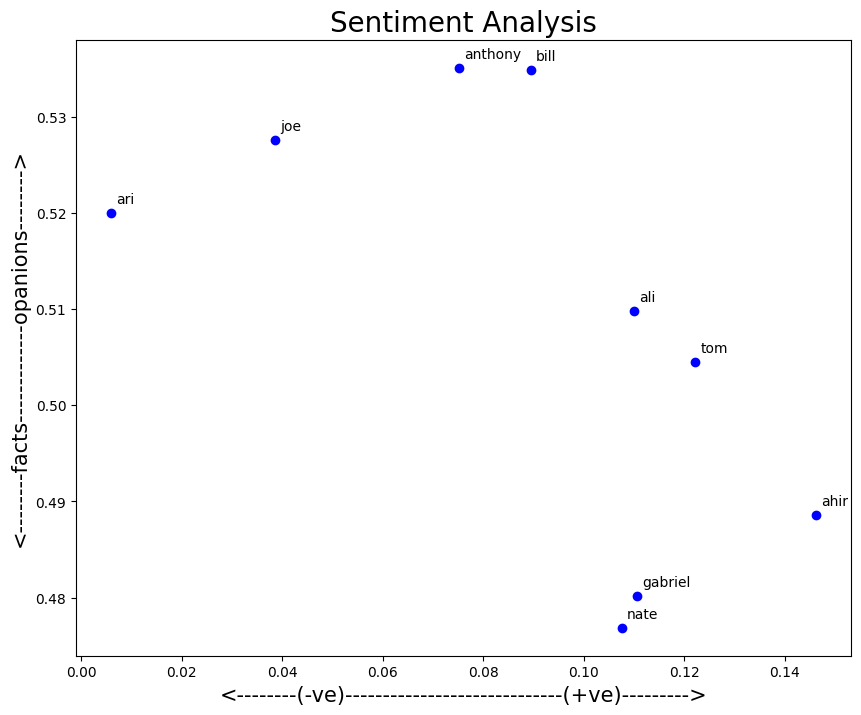

In [6]:
# lets plot the results
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 8))

for i, c in enumerate(data.index):
    x = data.polarity.loc[c]
    y = data.subjectivity.loc[c]
    plt.scatter(x, y, color='blue')
    plt.text(x+0.001, y+0.001, data.index[i], fontsize=10)
    # plt.xlim(-0.01, 0.12)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<--------(-ve)-----------------------------(+ve)--------->', fontsize=15)
plt.ylabel('<--------facts-------------opanions-------->', fontsize=15)
plt.show()

## 1.3 Sentiment of Routine Over Time
Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over the time throughout each routine.

In [14]:
import numpy as np
import math

def split_text(text, n=10):
    """Takes in a string of text and splits into n equal parts (default)"""

    length = len(text) # calculate length of text
    size = length//n
    start = np.arange(0,length, size)

    # pull out qually sized pieces of text and put it into a list
    split_list = []
    for p in range(n):
        split_list.append(text[start[p]: start[p]+size])
    return split_list

In [15]:
# Let's create a list to hold all of the pieces of text 
pieces = []
for t in data.transcript:
    pieces.append(split_text(t))

In [19]:
print(len(pieces[0]),len(pieces))

10 9


In [24]:
polarity_transcript = []
for piece in pieces:
    polarity_piece = []
    for t in piece:
        polarity_piece.append(TextBlob(t).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

# polarity_transcript

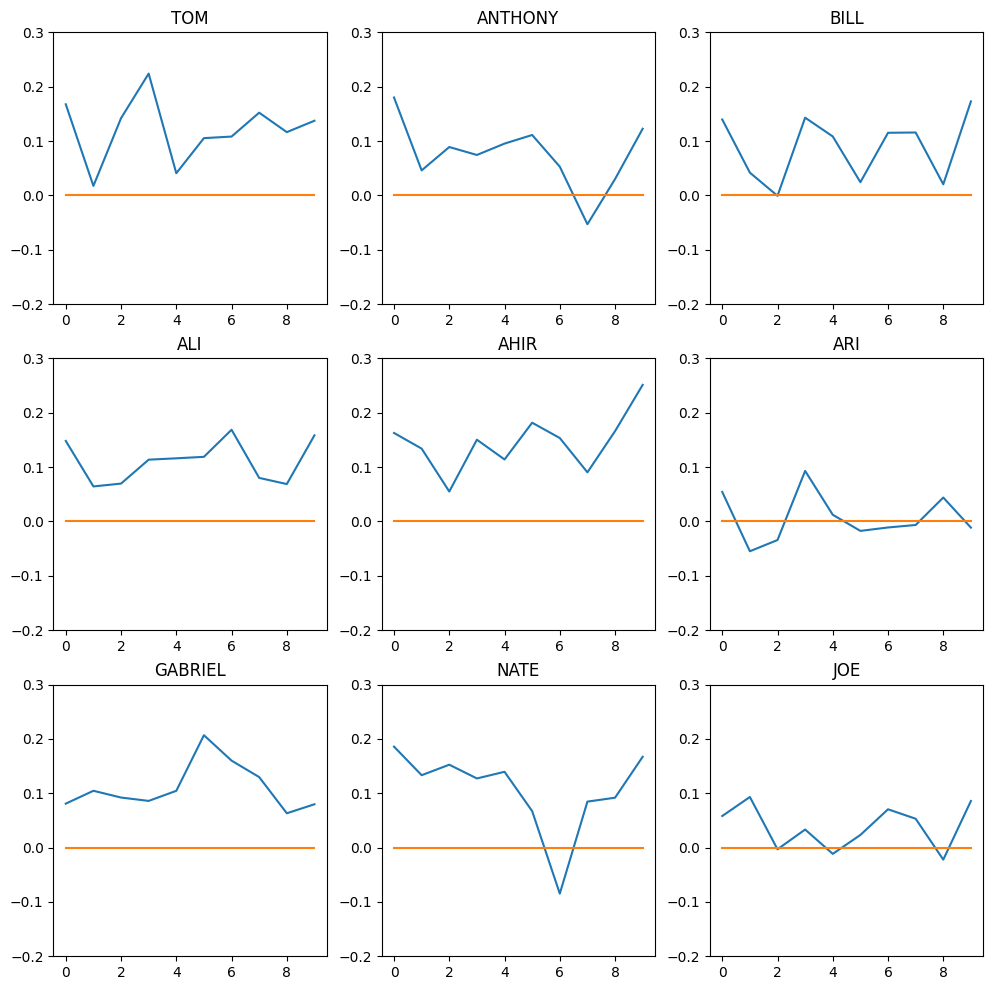

In [29]:
# show the plot for all comedians
plt.figure(figsize=(12,12))

for i, c in enumerate(data.index):
    plt.subplot(3, 3, i+1)
    plt.plot(polarity_transcript[i])
    plt.plot(np.arange(0, 10), np.zeros(10))
    plt.title(c.upper())
    plt.ylim(-0.2,0.3)

plt.show()

### TOM, BILL, ALI, AHIR, GABRIEL stay positive throughout their routine